# Notebook 1: Filtros con OpenCV

Una componente fundamental de las redes neuronales convolucionales son el operador de convolución y los filtros. En concreto, el operador de convolución transforma las imágenes de entrada con el fin de que ciertas características de la imagen se vuelvan más dominantes y destaquen por encima del resto. En este notebook veremos cómo funciona el operador de convolución y cómo los filtros nos van a permitir, entre otras cosas, resaltar los bordes de la imagen para su detección.

## Pasos previos

El primer paso de todos será cargar las librerías y paquetes necesarios, en este caso con las que más vamos a trabajar son:
* Numpy es una extensión de Python, que le permite realizar operaciones con vectores y matrices.
* Cv2 es OpenCV  una biblioteca libre de visión artificial.
* Matpltolib es una biblioteca para la generación de gráficos a partir de datos
* Rescale_intensity devuelve la imagen después de estirar o reducir sus niveles de intensidad.



In [0]:
from skimage.exposure import rescale_intensity 
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

## Cargar y mostrar imágenes
El siguiente paso será cargar la imagen a la que vamos a aplicar las transformaciones, en este caso usamos la librería *opencv*, en concreto la instrucción *cv2.imread()* que nos carga la imagen que le indiquemos.



In [0]:
image = cv2.imread("jemma.png")

Todos los filtros pueden aplicarse a imágenes de 8 bits, por ello transformamos la imagen de entrada a escala de grises. Así aseguramos que todos los filtros puedan aplicarse.

In [0]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

Por otro lado, a la hora de mostrar las imágenes lo normal sería utilizar la instrucción *cv2.imshow()* pero al estar trabajando sobre cuadernos de Jupyter esta instrucción no funciona bien, por lo que vamos a usar la función *mostrarImagen()* a la que le pasamos como parámetro la imagen a mostrar. 

In [0]:
def mostrarImagen(image):
    if len(image.shape)==3:
        img2 = image[:,:,::-1]
        plt.imshow(img2)
        plt.show()
    else:
        img2 = image
        plt.imshow(img2,cmap='gray')
        plt.show()

Mostramos la imagen cargada en el paso anterior.

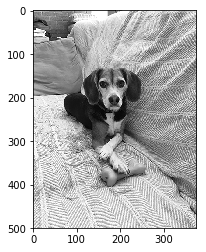

In [0]:
mostrarImagen(gray)

## Función de convolución
Definimos la función de convolución, esta función tiene dos parámetros de entrada: la imagen y el núcleo que queremos aplicarle a la imagen. Dada nuestra imagen y el núcleo se determina el ancho y alto de cada uno. Uno de los puntos más importantes en la convolución es el proceso de "deslizar" una matriz convolucional (el núcleo) a través de una imagen. Este proceso reduce el tamaño de la imagen así que replicamos los píxeles del borde de la imagen, de modo que la dimensión de la imagen de salida coincidirá con la de entrada.

In [0]:
def convolve(image, K):
    # tomamos las dimensiones de la imagen y del núcleo
    (iH, iW) = image.shape[:2]
    (kH, kW) = K.shape[:2]
    # se asigna memoria para la imagen de salida teniendo cuidado del redimensionamiento
    pad = (kW - 1) // 2
    image = cv2.copyMakeBorder(image, pad, pad, pad, pad,
        cv2.BORDER_REPLICATE)
    output = np.zeros((iH, iW), dtype="float")
    # sobre la imagen de entrada "deslizamos" el núcleo a través de cada punto, 
    # de izquierda a derecha y de arriba a abajo
    for y in np.arange(pad, iH + pad):
        for x in np.arange(pad, iW + pad):
            # extraemos el Roi de la imagen
            roi=image[y-pad:y+pad+1,x-pad:x+pad+1]

            # realizamos la convolución haciendo la multiplicación del Roi(región de interés) 
            #y el núcleo y luego sumando la matriz
            k = (roi * K).sum()

            # almacenamos el valor convolucionado en la salida
            output[y-pad,x-pad]=k
    # rescalamos la imagen de salida para que se encuentre en el rango [0, 255]
    output = rescale_intensity(output, in_range=(0, 255))
    output = (output * 255).astype("uint8")
    # devolvemos la imagen de salida
    return output



## Núcleos y resultados
Ahora vamos a ir definiendo los núcleos que queremos aplicar a la imagen y mostrando los resultados obtenidos.

**Sharpen**

Empezamos con el filtro de sharpen, la función de este filtro es realzar los detalles finos de la imagen.

In [0]:
# construimos el filtro sharpen
sharpen = np.array((
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]), dtype="int")

Se va a realizar la convolución tanto con el operador que se ha definido antes, como con el proporcionado por OpenCV "filter2D"

Original


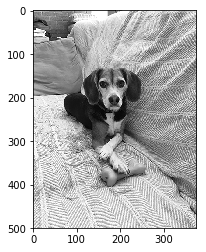

Convolución propia


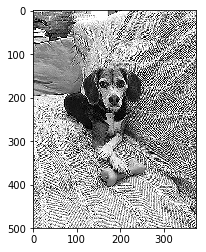

Convolución OpenCV


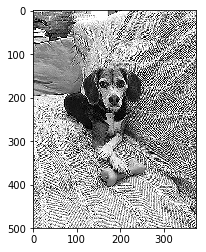

In [0]:
convolveOutput = convolve(gray, sharpen)
opencvOutput = cv2.filter2D(gray, -1, sharpen)
print("Original")
mostrarImagen(gray)
print("Convolución propia")
mostrarImagen(convolveOutput)
print("Convolución OpenCV")
mostrarImagen(opencvOutput)

**Laplace**

El siguiente filtro es el filtro de Laplace, este filtro se utiliza para la detección de bordes de la imagen.

In [0]:
laplacian = np.array((
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]), dtype="int")

Original


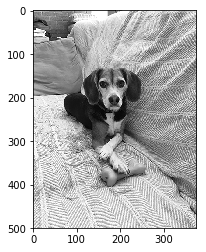

Convolución propia


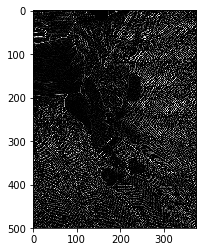

Convolución OpenCV


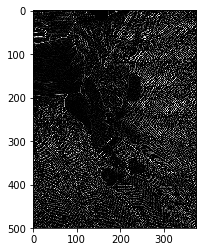

In [0]:
convolveOutput = convolve(gray, laplacian)
opencvOutput = cv2.filter2D(gray, -1, laplacian)
print("Original")
mostrarImagen(gray)
print("Convolución propia")
mostrarImagen(convolveOutput)
print("Convolución OpenCV")
mostrarImagen(opencvOutput)

**SobelX - SobelY**

Tanto este filtro como el siguiente sirven para la detección de bordes a lo largo de los ejes x e y basándose en el gradiente de la intensidad.

**SobelX**

Empezamos construyendo el núcleo Sobel x

In [0]:
sobelX = np.array((
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]), dtype="int")

Original


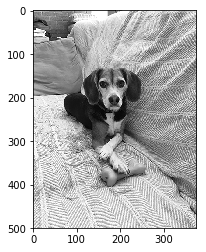

Convolución propia


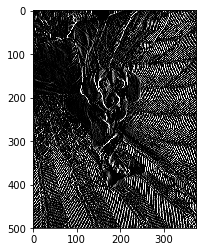

Convolución OpenCV


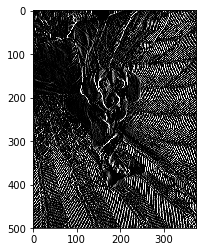

In [0]:
convolveOutput = convolve(gray, sobelX)
opencvOutput = cv2.filter2D(gray, -1, sobelX)
print("Original")
mostrarImagen(gray)
print("Convolución propia")
mostrarImagen(convolveOutput)
print("Convolución OpenCV")
mostrarImagen(opencvOutput)

**SobelY**

Construimos el núcleo Sobel y

In [0]:
sobelY = np.array((
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]), dtype="int")

Original


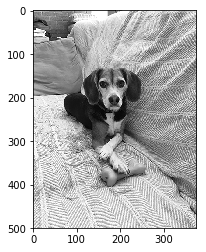

Convolución propia


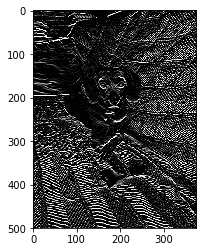

Convolución OpenCV


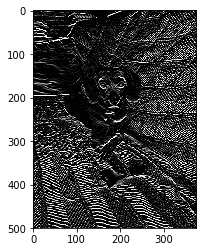

In [0]:
convolveOutput = convolve(gray, sobelY)
opencvOutput = cv2.filter2D(gray, -1, sobelY)
print("Original")
mostrarImagen(gray)
print("Convolución propia")
mostrarImagen(convolveOutput)
print("Convolución OpenCV")
mostrarImagen(opencvOutput)

**Emboss**

Y por último tenemos el filtro Emboss cuya función es dar relieve.

In [0]:
# construimos el núcleo emboss
emboss = np.array((
    [-2, -1, 0],
    [-1, 1, 1],
    [0, 1, 2]), dtype="int")

Original


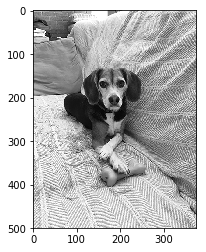

Convolución propia


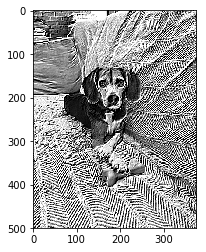

Convolución OpenCV


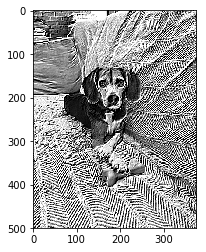

In [0]:
convolveOutput = convolve(gray, emboss)
opencvOutput = cv2.filter2D(gray, -1, emboss)
print("Original")
mostrarImagen(gray)
print("Convolución propia")
mostrarImagen(convolveOutput)
print("Convolución OpenCV")
mostrarImagen(opencvOutput)

# Los filtros de OpenCV

A parte de estos filtros que hemos definido para usar con la función de convolución, openCV nos permite probar con otros filtros ya definidos como puede ser el filtro de Gauss, el bilateral, etc. Estos filtros se pueden separar en dos bloques, por un lado los lineales donde cada píxel se sustituye por una combinación lineal de los píxeles vecinos como por ejemplo el de Gauss y los no lineales donde se calcula el nuevo valor de cada píxel a partir de los píxeles vecinos mediante alguna función no lineal como puede ser el caso del filtro bilateral.

**Filtros lineales - Gauss**

Empezamos con el filtro de Gauss, este filtro se usa para suavizar las imágenes y eliminar el ruido. En este caso no hay que construir el núcleo si no que  ya están definidos y sólo hay que dar el tamaño del núcleo.

Original


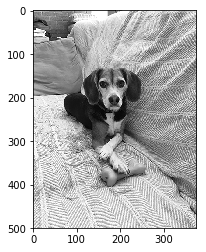

Convolución OpenCV


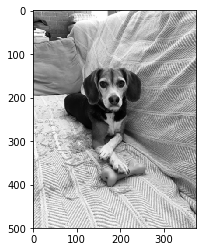

In [0]:
opencvOutput = cv2.GaussianBlur(gray, (3,3),0)
print("Original")
mostrarImagen(gray)
print("filtro de Gauss")
mostrarImagen(opencvOutput)

**Filtros lineales - Media**

Otro de los filtro lineales es la media y se utiliza para suavizar las imágenes. 

Original


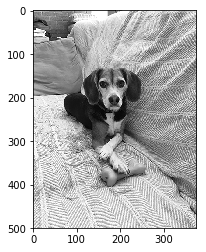

Convolución OpenCV


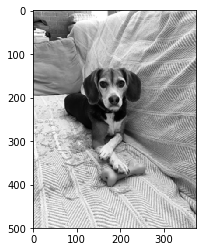

In [0]:
#Filtro de la media
opencvOutput = cv2.blur(gray,(3,3))
print("Original")
mostrarImagen(gray)
print("Filtro de la media")
mostrarImagen(opencvOutput)

**Filtros no lineales - Bilateral**

El siguiente filtro que vamos a ver es el filtro bilateral, este filtro a diferencia del Gaussiano es un filtro no lineal encargado de preservar los bordes, reductor de ruido y suvizar la imagen.

Original


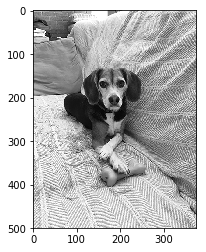

Convolución OpenCV


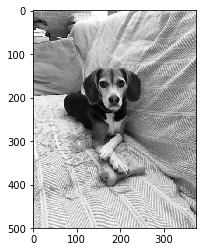

In [0]:
#Filtro bilateral
opencvOutput = cv2.bilateralFilter(gray,3,75,75)
print("Original")
mostrarImagen(gray)
print("Filtro bilateral")
mostrarImagen(opencvOutput)

**Filtros no lineales - Mediana**

El último filtro que vamos a ver es el filtro de la mediana, este filtro se usa para eliminar el ruido de la imagen

Original


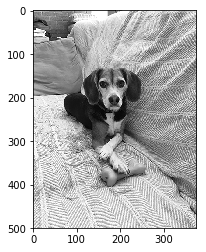

Convolución OpenCV


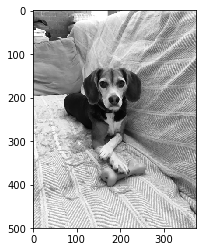

In [0]:
#Filtro de la mediana
opencvOutput = cv2.medianBlur(gray,3)
print("Original")
mostrarImagen(gray)
print("Filtro de la mediana")
mostrarImagen(opencvOutput)